In [156]:
import pandas as pd
import missingno as mno
import xgboost as xgb
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.cluster import KMeans
from sklearn import tree,preprocessing 
from sklearn.ensemble import RandomForestClassifier

# Dans ce Notebook on va esseyer de remplacer les valeurs manquante par de la classification ou autre(regression, clustering) si besoin

In [43]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [44]:
df_train.drop('Loan_Status', 1, inplace=True)

In [45]:
df = df_train.append(df_test)
df.reset_index(inplace=True)
df.drop(['index'], inplace=True, axis=1)

In [22]:
#df = df.drop("Loan_ID", axis=1)

In [46]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural


In [47]:
df.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [95]:
df["Married"].isnull().sum()

3

In [48]:
df_married = df.drop("Married",axis=1)
df_married

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
977,LP002975,Male,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
978,LP002980,Male,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban
979,LP002986,Male,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural


In [100]:
dftarget_married = df[["Loan_ID","Married"]]
dftarget_married

,Loan_ID,Married
0,LP001002,No
1,LP001003,Yes
2,LP001005,Yes
3,LP001006,Yes
4,LP001008,No
...,...,...
976,LP002971,Yes
977,LP002975,Yes
978,LP002980,No
979,LP002986,Yes


In [102]:
dftarget_married.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

'No'

In [104]:
dfmarriednull = dftarget_married[dftarget_married.isnull().any(axis=1) == True]
dfmarriednull

,Loan_ID,Married
104,LP001357,NaN
228,LP001760,NaN
435,LP002393,NaN


In [72]:
df_marriedrownull = df_married[df_married.isnull().any(axis=1) == True]
df_marriedrownull

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
11,LP001027,Male,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban
16,LP001034,Male,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban
19,LP001041,Male,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban
23,LP001050,NaN,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...
950,LP002853,Female,0,Not Graduate,No,3015,2000.0,145.0,360.0,NaN,Urban
965,LP002901,Male,0,Graduate,No,2283,15000.0,106.0,360.0,NaN,Rural
972,LP002954,Male,2,Not Graduate,No,3132,0.0,76.0,360.0,NaN,Rural
974,LP002965,Female,0,Graduate,No,8550,4255.0,96.0,360.0,NaN,Urban


In [76]:
df_married = df_married.dropna()
df_married

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,LP001003,Male,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,LP001011,Male,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
975,LP002969,Male,1,Graduate,No,2269,2167.0,99.0,360.0,1.0,Semiurban
976,LP002971,Male,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
977,LP002975,Male,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
979,LP002986,Male,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural


In [75]:
df_married.columns[0]

'Loan_ID'

In [77]:
lb = LabelEncoder()
for i in df_married.columns[1:]:
    df_married[i] = lb.fit_transform(df_married[i])

C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
df_married

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,LP001003,1,1,0,0,379,78,85,10,1,0
2,LP001005,1,0,0,1,174,0,27,10,1,2
3,LP001006,1,0,1,0,116,196,77,10,1,2
4,LP001008,1,0,0,0,473,0,98,10,1,2
5,LP001011,1,2,0,1,439,300,183,10,1,2
...,...,...,...,...,...,...,...,...,...,...,...
975,LP002969,1,1,0,0,73,177,56,10,1,1
976,LP002971,1,3,1,1,324,120,70,10,1,2
977,LP002975,1,0,0,0,337,17,72,10,1,2
979,LP002986,1,0,0,0,417,201,115,10,1,0


In [84]:
df_married.Loan_ID.isin(df_marriedrownull.Loan_ID)

1      False
2      False
3      False
4      False
5      False
       ...  
975    False
976    False
977    False
979    False
980    False
Name: Loan_ID, Length: 769, dtype: bool

In [108]:
dftarget_married2 = dftarget_married[dftarget_married.Loan_ID.isin(df_marriedrownull.Loan_ID) == False]

In [111]:
dftarget_married2

,Loan_ID,Married
1,LP001003,1
2,LP001005,1
3,LP001006,1
4,LP001008,0
5,LP001011,1
...,...,...
975,LP002969,1
976,LP002971,1
977,LP002975,1
979,LP002986,1


In [110]:
dftarget_married2['Married'] = lb.fit_transform(dftarget_married2['Married'])

C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
X = df_married.drop("Loan_ID",axis=1)
y = dftarget_married2.drop("Loan_ID",axis=1)

In [212]:
X_scaled = pd.DataFrame(preprocessing.scale(X), columns = X.columns)

In [214]:
X = X_scaled

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [240]:
est = KMeans(n_clusters=2, n_init=20,init='k-means++')
est.fit(X_train)
pred_Kmean = est.predict(X_test)
K_pred = pd.DataFrame(pred_Kmean, columns=['Outcome'])
K_pred

,Outcome
0,0
1,1
2,1
3,0
4,1
...,...
72,0
73,0
74,1
75,1


In [241]:
K_pred["Outcome"].value_counts()

0    44
1    33
Name: Outcome, dtype: int64

In [242]:
y_test["Married"].value_counts()

1    48
0    29
Name: Married, dtype: int64

In [243]:
regressionlogistique = LogisticRegression(solver = 'liblinear')
regressionlogistique.fit(X_train, y_train)

regressionlogistique_pred = regressionlogistique.predict(X_test)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [244]:
print(classification_report(y_test,regressionlogistique_pred))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63        29
           1       0.76      0.88      0.82        48

    accuracy                           0.75        77
   macro avg       0.75      0.71      0.72        77
weighted avg       0.75      0.75      0.74        77



In [245]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)
print(classification_report(y_test,y_pred_rfc))

C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.78      0.62      0.69        29
           1       0.80      0.90      0.84        48

    accuracy                           0.79        77
   macro avg       0.79      0.76      0.77        77
weighted avg       0.79      0.79      0.79        77



In [246]:
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knncla.fit(X_train, y_train)
KNeighborsClassifierpred = knncla.predict(X_test)
print(classification_report(y_test,KNeighborsClassifierpred))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67        29
           1       0.79      0.85      0.82        48

    accuracy                           0.77        77
   macro avg       0.75      0.74      0.74        77
weighted avg       0.76      0.77      0.76        77



C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [247]:
XGboostcla = xgb.XGBClassifier()

In [248]:
train_Xgboost = XGboostcla.fit(X_train, y_train)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [249]:
predgbcla = train_Xgboost.predict(X_test)
print(classification_report(y_test,predgbcla))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.77      0.90      0.83        48

    accuracy                           0.77        77
   macro avg       0.76      0.72      0.73        77
weighted avg       0.77      0.77      0.76        77



In [250]:
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,y_train)
y_pred_svc = support_vector_classifier.predict(X_test)
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        29
           1       0.79      0.88      0.83        48

    accuracy                           0.78        77
   macro avg       0.77      0.75      0.76        77
weighted avg       0.78      0.78      0.77        77



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


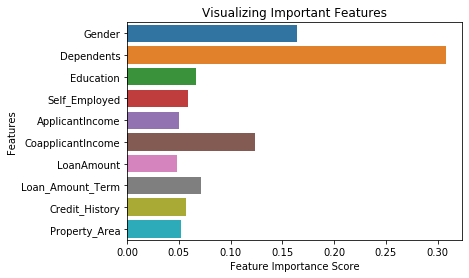

In [252]:
sns.barplot(x=train_Xgboost.feature_importances_, y=X.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [253]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dtr=dtree.fit(X_train, y_train)
dtrpred = dtree.predict(X_test)
print(classification_report(y_test,dtrpred))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50        29
           1       0.70      0.73      0.71        48

    accuracy                           0.64        77
   macro avg       0.61      0.61      0.61        77
weighted avg       0.63      0.64      0.63        77



In [ ]:
dfmarriednull["Married"] = 